uni: dcg2163

# MNIST Sign Language

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [2]:
class SignLanguage:
    def __init__(self):
        self.model = None

        self.data = {
            "train": None,
            "test": None
        }
        self.create_model()

    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """
        model = Sequential()

        # adds a convolutional layer with 32 filters of size 3x3 and relu activation function with 28x28 pixel greyscale images
        model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(MaxPooling2D((2, 2)))

        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))

        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(26, activation='softmax'))

        # Use keras.optimizers.Adam
        model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

        self.model = model

    def prepare_data(self, images, labels):
        """
        Normalize the dataset and split it into train/test. Save in self.data["train"] and self.data["test"].
        """
        # Normalize the images
        images = images / 255.0
        images = images.reshape(-1, 28, 28, 1)  # Reshape to 28x28x1

        # One-hot encode the labels
        labels = to_categorical(labels, num_classes=26)

        # Split into train and test sets
        x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

        self.data = {
            "train": (x_train, y_train),
            "test": (x_test, y_test)
        }

    def train(self, batch_size=128, epochs=50, verbose=1):
        """
        Train the model using model.fit().
        """
        x_train, y_train = self.data["train"]
        history = self.model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_split=0.2)
        return history

    def predict(self, data):
        """
        Predict labels for test data.
        """
        # Normalize and reshape the test data
        data = data / 255.0
        data = data.reshape(-1, 28, 28, 1)

        predictions = self.model.predict(data)
        return np.argmax(predictions, axis=1)

    def visualize_data(self, data):
      """
      Visualize the hand gestures.

      :param data: tuple (images, labels) or array of images
      """
      if data is None:
          return

      # Get the images from the data tuple
      if isinstance(data, tuple):
          images = data[0]  # Assuming (images, labels) format
      else:
          images = data

      # Ensure the dataset isn't smaller than the visualization grid
      nrows, ncols = 5, 5
      num_images = min(len(images), nrows * ncols)

      fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
      plt.subplots_adjust(wspace=0, hspace=0)

      for i in range(num_images):
          row, col = divmod(i, ncols)
          axs[row][col].imshow(images[i].reshape(28, 28), cmap='gray')
          axs[row][col].axis('off')  # Hide axis for cleaner visualization

      # Remove unused subplots if the dataset size is smaller
      for j in range(num_images, nrows * ncols):
          row, col = divmod(j, ncols)
          axs[row][col].axis('off')

      plt.show()


    def visualize_accuracy(self, history):
        """
        Plot accuracy measures given a keras history object.
        """
        if history is None:
            return

        plt.plot(history.history["accuracy"])
        plt.plot(history.history["val_accuracy"])
        plt.title("Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend(["Train", "Validation"])
        plt.show()


# Grading Script

Do NOT modify this section

In [3]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [4]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


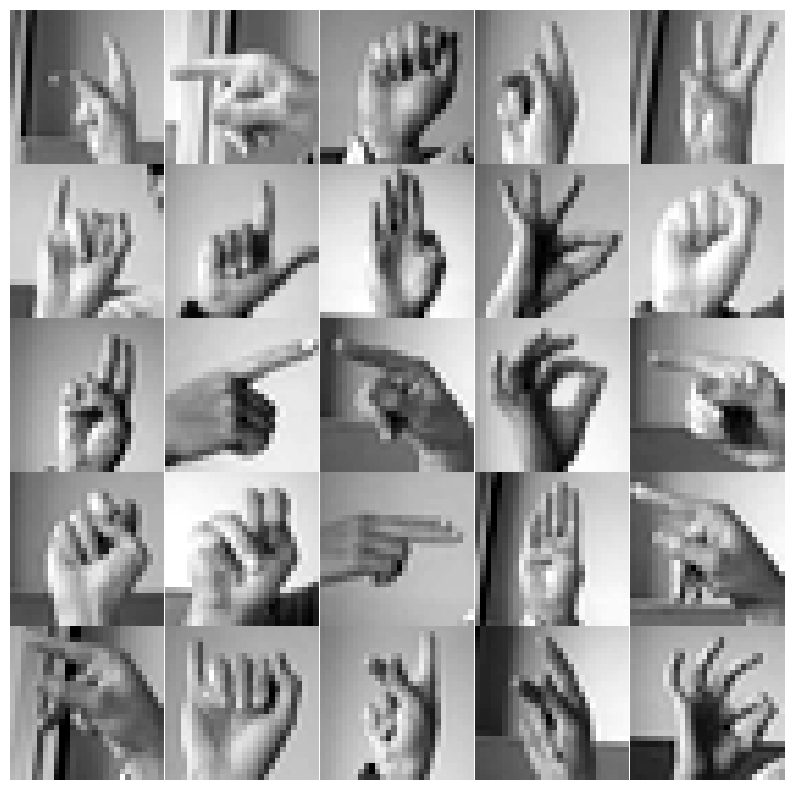

In [5]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

Epoch 1/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.1200 - loss: 3.0067 - val_accuracy: 0.6585 - val_loss: 1.2775
Epoch 2/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5513 - loss: 1.4275 - val_accuracy: 0.8577 - val_loss: 0.5784
Epoch 3/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7220 - loss: 0.8461 - val_accuracy: 0.9256 - val_loss: 0.3202
Epoch 4/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8044 - loss: 0.5840 - val_accuracy: 0.9572 - val_loss: 0.2090
Epoch 5/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8564 - loss: 0.4271 - val_accuracy: 0.9827 - val_loss: 0.1215
Epoch 6/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9011 - loss: 0.3151 - val_accuracy: 0.9918 - val_loss: 0.0612
Epoch 7/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9135 - loss: 0.2590 - val_accuracy: 0.9957 - val_loss: 0.0517
Epoch 8/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9327 - loss: 0.2077 - val_accuracy: 0

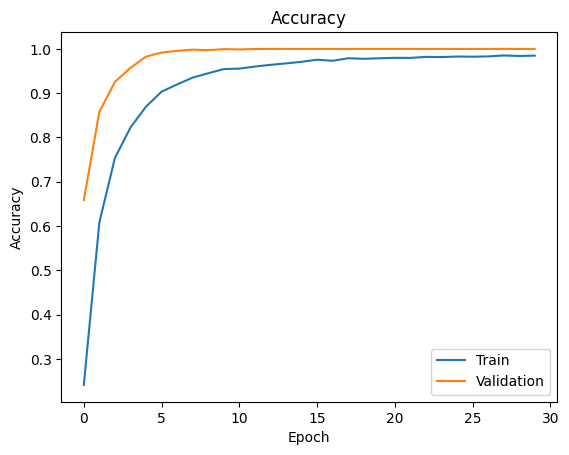

In [6]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [7]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
0.925404350250976
